In [2]:
import tensorflow as tf
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.16.1


In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train) , (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

C:\Users\Muhammad Umar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.07794937,  0.17450748, -0.39051044,  0.53978115,  0.14127755,
        -0.41972712, -0.37863594,  0.04934124,  0.6657119 ,  0.36604506]],
      dtype=float32)

In [16]:
tf.nn.softmax(predictions).numpy()

array([[0.09322515, 0.10267573, 0.05835574, 0.1479463 , 0.09931988,
        0.05667546, 0.05905282, 0.09059595, 0.16780123, 0.12435164]],
      dtype=float32)

In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [18]:
loss_fn(y_train[:1], predictions).numpy()

2.870414

In [19]:
model.compile(optimizer = 'adam',
              loss = loss_fn,
              metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8564 - loss: 0.4926
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9563 - loss: 0.1531
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9661 - loss: 0.1106
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9726 - loss: 0.0911
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9773 - loss: 0.0764


In [21]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9757 - loss: 0.0769


[0.0769059807062149, 0.9757000207901001]

In [22]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()  
])

In [23]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.2573778e-08, 3.9900254e-07, 2.6910734e-06, 2.7161714e-04,
        1.6986297e-08, 5.4783800e-07, 4.6615662e-15, 9.9971277e-01,
        1.1433964e-06, 1.0764079e-05],
       [1.9898669e-06, 5.1719970e-05, 9.9988604e-01, 9.9921917e-06,
        7.9322697e-14, 4.3631695e-05, 4.9048554e-06, 8.7931978e-13,
        1.6637871e-06, 6.4133442e-13],
       [9.1291206e-08, 9.9959940e-01, 1.3662374e-05, 1.0659301e-05,
        1.6336851e-05, 4.2861529e-06, 7.6556580e-06, 3.0056306e-04,
        4.6679022e-05, 7.0118767e-07],
       [9.9978262e-01, 1.2354693e-07, 1.3460859e-04, 5.9230234e-07,
        1.5303930e-06, 5.1314910e-05, 2.5123660e-05, 2.2659972e-06,
        2.1540576e-07, 1.6064863e-06],
       [5.4184790e-07, 7.4883060e-09, 2.6375445e-05, 1.6141203e-07,
        9.9860042e-01, 4.0619766e-06, 5.1811230e-06, 6.4313157e-05,
        1.0612394e-05, 1.2882679e-03]], dtype=float32)>

In [7]:
from fastbook import *

In [8]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls), urls[0]

(1,
 'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg')

In [9]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

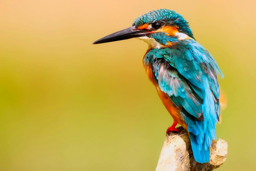

In [10]:
im = Image.open(dest)
im.to_thumb(256,256)

In [12]:
import openai 
openai.api_key = "sk-"

In [21]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [22]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

In [23]:
text = f"""
You should express what you want a model to do by \ 
providing instructions that are as clear and \ 
specific as you can possibly make them. \ 
This will guide the model towards the desired output, \ 
and reduce the chances of receiving irrelevant \ 
or incorrect responses. Don't confuse writing a \ 
clear prompt with writing a short prompt. \ 
In many cases, longer prompts provide more clarity \ 
and context for the model, which can lead to \ 
more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks \ 
into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print(response)

APIRemovedInV1: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


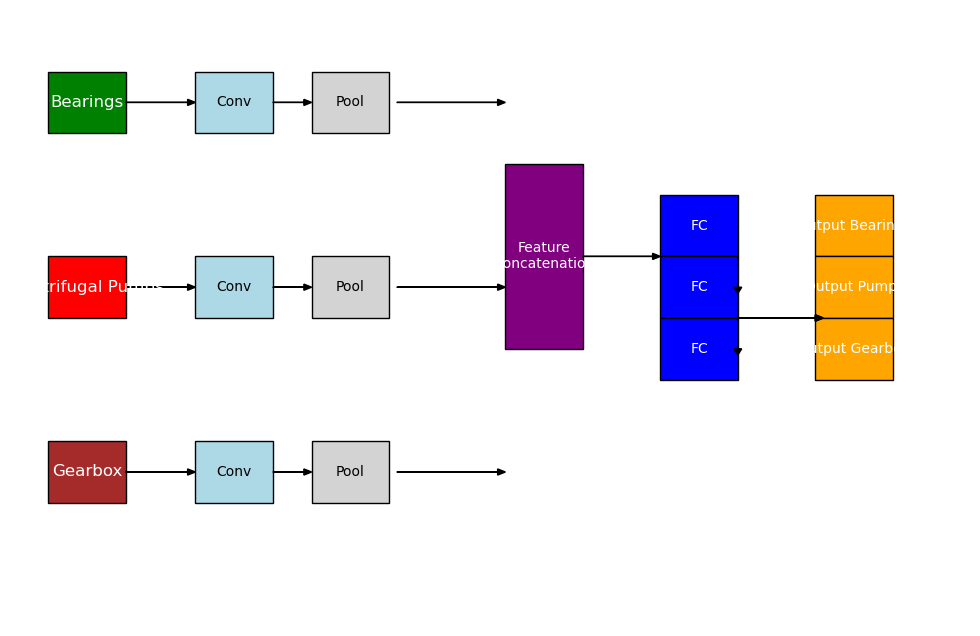

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 8))

# Colors for different datasets
colors = {
    'Bearings': 'green',
    'Centrifugal Pumps': 'red',
    'Gearbox': 'brown',
    'Feature Concatenation': 'purple',
    'Fully Connected': 'blue',
    'Output': 'orange'
}

# Input layers
input_layers = ['Bearings', 'Centrifugal Pumps', 'Gearbox']
y_positions = [8, 5, 2]

for y, label in zip(y_positions, input_layers):
    rect = patches.Rectangle((0.1, y), 1, 1, linewidth=1, edgecolor='black', facecolor=colors[label])
    ax.add_patch(rect)
    ax.text(0.6, y + 0.5, label, horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')

# Convolution and Pooling layers
for y in y_positions:
    conv_rect = patches.Rectangle((2, y), 1, 1, linewidth=1, edgecolor='black', facecolor='lightblue')
    pool_rect = patches.Rectangle((3.5, y), 1, 1, linewidth=1, edgecolor='black', facecolor='lightgrey')
    ax.add_patch(conv_rect)
    ax.add_patch(pool_rect)
    ax.text(2.5, y + 0.5, 'Conv', horizontalalignment='center', verticalalignment='center', fontsize=10)
    ax.text(4, y + 0.5, 'Pool', horizontalalignment='center', verticalalignment='center', fontsize=10)

# Feature Concatenation
concat_rect = patches.Rectangle((6, 4.5), 1, 3, linewidth=1, edgecolor='black', facecolor=colors['Feature Concatenation'])
ax.add_patch(concat_rect)
ax.text(6.5, 6, 'Feature\nConcatenation', horizontalalignment='center', verticalalignment='center', fontsize=10, color='white')

# Fully Connected Layers
fc_layers_y = [6, 5, 4]
for y in fc_layers_y:
    fc_rect = patches.Rectangle((8, y), 1, 1, linewidth=1, edgecolor='black', facecolor=colors['Fully Connected'])
    ax.add_patch(fc_rect)
    ax.text(8.5, y + 0.5, 'FC', horizontalalignment='center', verticalalignment='center', fontsize=10, color='white')

# Output layers
output_labels = ['Output Bearings', 'Output Pumps', 'Output Gearbox']
output_y_positions = [6, 5, 4]
for y, label in zip(output_y_positions, output_labels):
    output_rect = patches.Rectangle((10, y), 1, 1, linewidth=1, edgecolor='black', facecolor=colors['Output'])
    ax.add_patch(output_rect)
    ax.text(10.5, y + 0.5, label, horizontalalignment='center', verticalalignment='center', fontsize=10, color='white')

# Arrows from inputs to convolutions
for y in y_positions:
    ax.arrow(1.1, y + 0.5, 0.8, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')

# Arrows from convolutions to pooling
for y in y_positions:
    ax.arrow(3, y + 0.5, 0.4, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')

# Arrows from pooling to concatenation
for y in y_positions:
    ax.arrow(4.6, y + 0.5, 1.3, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')

# Arrow from concatenation to first fully connected layer
ax.arrow(7, 6, 0.9, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')

# Arrows between fully connected layers
for y1, y2 in zip(fc_layers_y[:-1], fc_layers_y[1:]):
    ax.arrow(9, y1 + 0.5, 0, -1, head_width=0.1, head_length=0.1, fc='black', ec='black')

# Arrows from last fully connected layer to outputs
for y in output_y_positions:
    ax.arrow(9, 5, 1, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')

# Adjust plot
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis('off')

# Display plot
plt.show()


In [1]:
import pywt

x = [3,7,1,1,-2,5,4,6]
cA, cD = pywt.dwt(x, 'haar')

y = pywt.idwt(cA, cD, 'haar')

print(cA)
print(cD)
print(y)

[7.07106781 1.41421356 2.12132034 7.07106781]
[-2.82842712  0.         -4.94974747 -1.41421356]
[ 3.  7.  1.  1. -2.  5.  4.  6.]


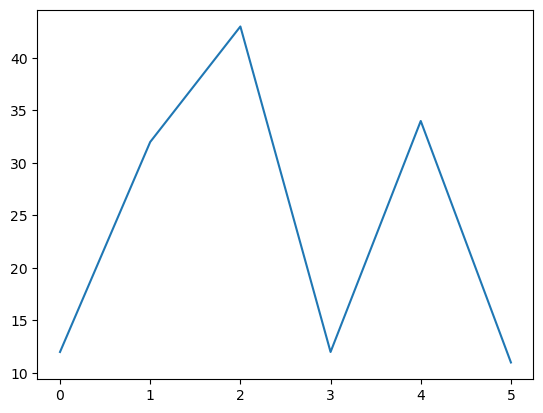

In [7]:
import matplotlib.pyplot as plt

x = [0,1,2,3,4,5]
y = [12,32,43,12,34,11]

plt.plot(x,y)